In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm
import math
import sympy as sym


In [ ]:
H, D, E, t = sym.symbols('H D E t')


column_params = {
    #'x' : [mean, std_dev]
    'H': np.array([10, 0.02]), #m
    'E': np.array([190e9, 10e9]), #N/m2
    'D': np.array([0.125, 0.0025]), #m
    't': np.array([0.005, 0.0006]), #m 
    
    'K_factor': 2,
    'P_max': 13000 
}

LSF = math.pi**3 * E * D**3 * t - 32 * 13000 * H**2

subs = {
    'H': column_params['H'][0],
    'E': column_params['E'][0],
    'D': column_params['D'][0],
    't': column_params['t'][0]
}

mu = LSF.subs(subs)

# Calculate the partial derivatives
d1 = sym.diff(LSF, H).subs(subs)
d2 = sym.diff(LSF, E).subs(subs)
d3 = sym.diff(LSF, D).subs(subs)
d4 = sym.diff(LSF, t).subs(subs)

# calculate the standard deviation
std_dev = math.sqrt(d1**2 * column_params['H'][1]**2 + d2**2 * column_params['E'][1]**2 + d3**2 * column_params['D'][1]**2 + d4**2 * column_params['t'][1]**2)
Beta = float(mu/std_dev)
print(f"Safety index = {Beta:.3f}")

# Calculate the failure probability (standard normal distribution with z-score = -Beta)  
Failure_prob = norm.cdf(-Beta)
print(f"Failure probability = {Failure_prob*100:.3f} % ")

x = np.linspace(-5, 5, 1000)


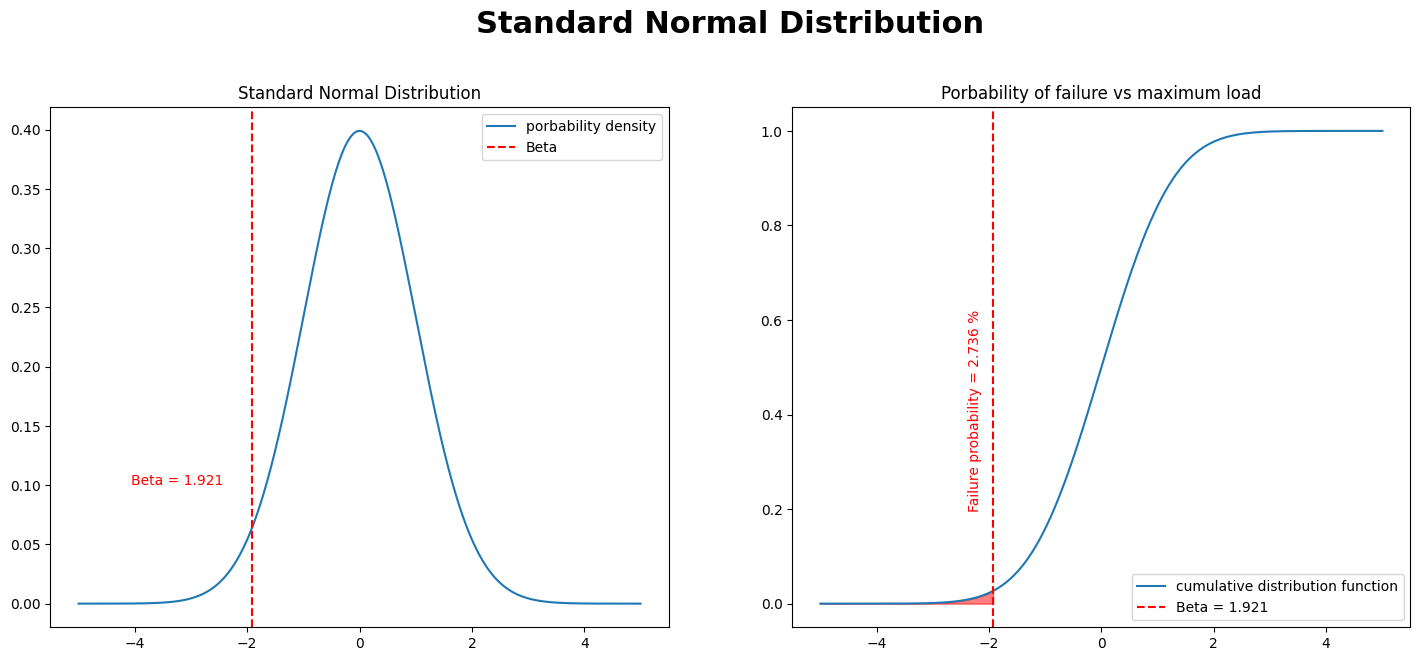

In [13]:
fig, ax = plt.subplots(1,2, figsize=(17,6.5))

x = np.linspace(-5, 5, 1000)

std_pdf = norm.pdf(x)
std_cdf = norm.cdf(x)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.suptitle('Standard Normal Distribution', fontsize=22, fontweight='bold', y=1.05)

ax[0].set_title('Standard Normal Distribution')  
ax[0].plot(x, std_pdf, label='porbability density')
ax[0].axvline(-Beta, color='r', linestyle='--', label='Beta')
ax[0].text(-Beta-0.5, 0.1, f'Beta = {Beta:.3f}', horizontalalignment='right', color='r')
ax[0].legend()

ax[1].set_title('Porbability of failure vs maximum load')
ax[1].plot(x, std_cdf, label='cumulative distribution function')
ax[1].axvline(-Beta, color='r', linestyle='--', label=f'Beta = {Beta:.3f}')
ax[1].text(-Beta-0.2, 0.2, f'Failure probability = {Failure_prob*100:.3f} %', rotation = 90, horizontalalignment='right', color='r')
ax[1].fill_between(x, std_cdf, where=(x <= -Beta), color='r', alpha=0.5)
ax[1].legend()


plt.show()